In [2]:
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'fake-news.ipynb',
 'submit.csv',
 'test.csv',
 'train.csv']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import binary_crossentropy
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [7]:
import nltk
# from nltk.corpus import re
import re
# from nltk.corpus import small
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
# print(stopwords)
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Ganesh
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df=pd.read_csv('train.csv')

In [9]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
df.shape

(20800, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [12]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [13]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [14]:
df.shape

(20800, 5)

In [15]:
XY=df.drop(columns=['id','text','author'],axis=1)

In [16]:
XY=XY.dropna(axis=0)

In [17]:
XY.shape

(20242, 2)

In [18]:
X=XY.drop('label',axis=1)
y=XY['label']

In [19]:
X.head()

,title
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...


In [20]:
X.shape

(20242, 1)

In [21]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [22]:
y.value_counts()

label
0    10387
1     9855
Name: count, dtype: int64

In [23]:
y.shape

(20242,)

In [24]:
vocblry_sz=5000

In [25]:
X_2=X.copy()
X_2.reset_index(inplace=True)
X_2.shape

(20242, 2)

In [26]:
X_2.tail()

,index,title
20237,20795,Rapper T.I.: Trump a ’Poster Child For White S...
20238,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20239,20797,Macy’s Is Said to Receive Takeover Approach by...
20240,20798,"NATO, Russia To Hold Parallel Exercises In Bal..."
20241,20799,What Keeps the F-35 Alive


In [27]:
X_2.shape

(20242, 2)

In [28]:
unencoded=[]
ps= PorterStemmer()
# wt= word_tokenize()
# for i in range(X_2.shape[0]):
for i in range(0, len(X_2)): 
    sent=re.sub('[^a-zA-Z]',' ',X_2['title'][i])
    sent=sent.lower()
    sent=sent.split()
#     sent=word_tokenize(sent)
    sent=[ps.stem(word) for word in sent if not word in stopwords.words('english')]
    sent=' '.join(sent)
    unencoded.append(sent)   
print('done')

done


In [29]:
len(unencoded)

20242

In [30]:
unencoded

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [31]:
# encoded=one_hot(encoded,vocblry_sz,inplace=True)
# one_hot(encoded,vocblry_sz,inplace=True)
encoded=[one_hot(sent,vocblry_sz) for sent in unencoded]
encoded

[[1886, 3656, 4816, 51, 2793, 1367, 2895, 1453, 3735, 4501],
 [4471, 2848, 2091, 1743, 792, 305, 1254],
 [1207, 1899, 2649, 3427],
 [3446, 3222, 730, 4973, 792, 3398],
 [848, 792, 3806, 445, 1314, 436, 792, 978, 2461, 4288],
 [2909,
  1157,
  2859,
  1467,
  4580,
  3202,
  3975,
  4500,
  894,
  4190,
  3521,
  4018,
  4642,
  1306,
  1254],
 [3488, 3488, 1271, 4864, 191, 3576, 538, 86, 4019, 1559, 447, 3887],
 [2558, 685, 3900, 902, 1446, 424, 1920, 1251, 4454, 4355, 4135],
 [3477, 4718, 585, 4290, 3202, 2738, 3834, 3060, 3801, 4447, 4454, 4355, 4135],
 [4234, 1443, 3506, 2877, 2523, 4833, 3202, 2892, 4454, 4355, 4135],
 [823, 4341, 3901, 4573, 1298, 3982, 653, 3214, 3202, 410],
 [2786, 3222, 4723, 222, 3976, 2384, 264, 1342],
 [3526, 1949, 3913, 1283, 3968, 2147, 1596, 3620, 555, 4033, 4937],
 [4973, 846, 2793, 3982, 3202, 2523],
 [4711, 1132, 1436, 4131, 273, 107, 54, 2704, 3701],
 [2100, 939, 4809, 3715, 3713, 2504, 4545, 4454, 4355, 4135],
 [3491, 568, 399, 1780, 4360, 4454, 4355

In [32]:
embed_len=20
upencoded=pad_sequences(encoded, padding='pre',maxlen=embed_len)
upencoded

array([[   0,    0,    0, ..., 1453, 3735, 4501],
       [   0,    0,    0, ...,  792,  305, 1254],
       [   0,    0,    0, ..., 1899, 2649, 3427],
       ...,
       [   0,    0,    0, ..., 4454, 4355, 4135],
       [   0,    0,    0, ...,  318, 2352, 3047],
       [   0,    0,    0, ..., 3132, 3701, 1067]])

In [33]:
upencoded.size

404840

In [34]:
embed_vec_features=40
model=Sequential()
model.add(Embedding(vocblry_sz,embed_vec_features,input_length=embed_len,))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
Xf=np.array(upencoded)
yf=np.array(y)

In [36]:
Xf.size

404840

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
xTr,xte,yTr,yte=train_test_split(Xf,yf,test_size=0.33,random_state=42)

In [38]:
xTr.shape

(13562, 20)

In [39]:
yTr.shape

(13562,)

In [40]:
# model.fit(xTr,yTr,epochs=10,batch_size=50)
history =model.fit(xTr,yTr,validation_data=(xte,yte),epochs=10,batch_size=64)

Epoch 1/10
212/212 [==============================] - 28s 78ms/step - loss: 0.2962 - accuracy: 0.8752 - val_loss: 0.2022 - val_accuracy: 0.9181
Epoch 2/10
212/212 [==============================] - 14s 67ms/step - loss: 0.1458 - accuracy: 0.9455 - val_loss: 0.1997 - val_accuracy: 0.9222
Epoch 3/10
212/212 [==============================] - 15s 70ms/step - loss: 0.1067 - accuracy: 0.9622 - val_loss: 0.2146 - val_accuracy: 0.9163
Epoch 4/10
212/212 [==============================] - 14s 65ms/step - loss: 0.0795 - accuracy: 0.9729 - val_loss: 0.2266 - val_accuracy: 0.9195
Epoch 5/10
212/212 [==============================] - 14s 67ms/step - loss: 0.0594 - accuracy: 0.9796 - val_loss: 0.2764 - val_accuracy: 0.9123
Epoch 6/10
212/212 [==============================] - 14s 66ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.3360 - val_accuracy: 0.9132
Epoch 7/10
212/212 [==============================] - 14s 66ms/step - loss: 0.0357 - accuracy: 0.9883 - val_loss: 0.3127 - val_accuracy:

In [41]:
ypred=model.predict(xte)
# ypred=np.argmax(ypred,axis=1)
# ypred.dtype()
for i in range(len(ypred)):
    if ypred[i]>0.5:
        ypred[i]=1
        
    else:
        ypred[i]=0

209/209 [==============================] - 5s 14ms/step


In [42]:
for i in range(400,600):
    print(ypred[i])

[0.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[0.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[1.]
[0.]
[1.]
[0.]
[1.]
[1.]
[0.]
[1.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[0.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]


In [43]:
y.value_counts()

label
0    10387
1     9855
Name: count, dtype: int64

In [44]:
confusion_matrix(ypred,yte)

array([[3091,  308],
       [ 319, 2962]], dtype=int64)

In [45]:
accuracy_score(yte,ypred)

0.9061377245508982

In [46]:
from sklearn.metrics import classification_report
print(classification_report(yte,ypred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3410
           1       0.90      0.91      0.90      3270

    accuracy                           0.91      6680
   macro avg       0.91      0.91      0.91      6680
weighted avg       0.91      0.91      0.91      6680



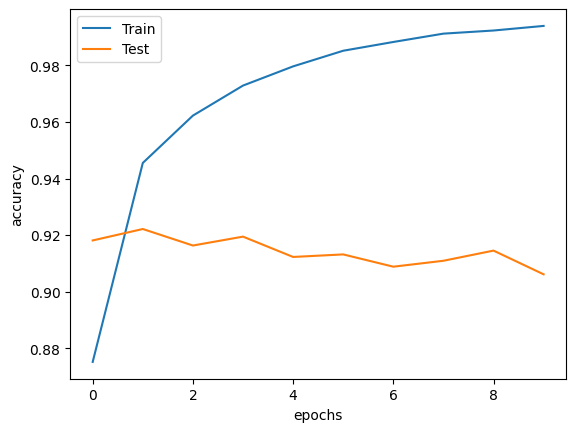

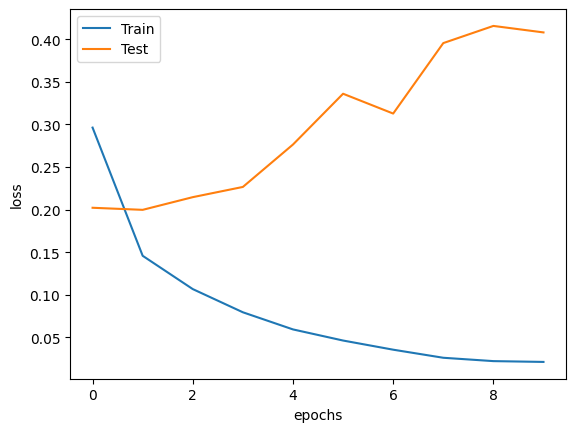

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()